In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#Fungsi aktivasi sigmoid
def activation(n,deriv=False):
    if deriv == True:
        return n*(1-n)
    else:
        return 1/(1+np.exp(-n))

In [2]:
data = pd.read_excel("D:\Python\Data Training.xlsx")
data.head()
#Get HS, FF, DD
new_data = data.iloc[:,1:4]
#SaveData
new_data.to_excel("D:\Python\Data Input.xlsx",index = False)

In [ ]:
#Normalize
data_normalize = new_data
for i in range(data_normalize.shape[1]):
    dataArray = np.array(data_normalize.iloc[:,i])
    dataMax = np.amax(dataArray)
    dataMin = 0
    Nrml = (0.8*(dataArray-dataMin)/(dataMax-dataMin))+0.1 #rentang data [0.1 - 0.9]
    data_normalize.iloc[:,i] = pd.DataFrame(Nrml)
data_normalize.head()
data_normalize.to_excel("D:\Python\Data Input_Normalisasi.xlsx",index = False)

In [3]:
#Arsitektur
# 21 - 11 - 7 
Input_Size = 21 #7 HS, 7 FF, 7 DD
Hidden_Size = 11
Output_Size = 7 #7 HS Output (t+1 -> t+7)
#Data_Train_Row = data_normalize.shape[0]-int(Input_Size/data_normalize.shape[1])
Data_Train_Row = 100

In [4]:
split_data = []
for i in range(Data_Train_Row):
    split_data1,split_data2,split_data3 = [],[],[]
    split_data1.append(np.array(data_normalize.iloc[:,0][i:i+int(Input_Size/data_normalize.shape[1])]))
    split_data2.append(np.array(data_normalize.iloc[:,1][i:i+int(Input_Size/data_normalize.shape[1])]))
    split_data3.append(np.array(data_normalize.iloc[:,2][i:i+int(Input_Size/data_normalize.shape[1])]))
    split_data1.extend(split_data2)
    split_data1.extend(split_data3)
    lattened_list = [element for sublist in split_data1 for element in sublist]
    split_data.append(lattened_list)
x_train = pd.DataFrame(split_data)

y_split_data = []
for i in range(int(Input_Size/data_normalize.shape[1]),Data_Train_Row+int(Input_Size/data_normalize.shape[1])):
    split_data1=[]
    split_data1.append(np.array(data_normalize.iloc[:,0][i:i+Output_Size]))
    lattened_list = [element for sublist in split_data1 for element in sublist]
    y_split_data.append(lattened_list)
y_train = pd.DataFrame(y_split_data)

In [5]:
#drop NaN
for i in range(Output_Size-1):
    x_train.drop(x_train.index[-1], inplace=True)
    y_train.drop(y_train.index[-1], inplace=True)
x_train.to_excel("D:\Python\X_Train.xlsx",index= False)
y_train.to_excel("D:\Python\Y_Train.xlsx",index= False)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [6]:
beta = 0.5
MaxEpoch = 10000
learningrate = 0.6
Error = 0.001

W1 = np.random.uniform(-beta,beta,size=(Input_Size, Hidden_Size))
W2 = np.random.uniform(-beta,beta,size=(Hidden_Size, Output_Size))
B1 = np.random.uniform(-beta,beta,size=(Hidden_Size))
B2 = np.random.uniform(-beta,beta,size=(Output_Size))

pd.DataFrame(W1).to_excel("D:\Python\W1_Train.xlsx")
pd.DataFrame(W2).to_excel("D:\Python\W2_Train.xlsx")
pd.DataFrame(B1).to_excel("D:\Python\B1_Train.xlsx")
pd.DataFrame(B2).to_excel("D:\Python\B2_Train.xlsx")


In [8]:
for k in range(MaxEpoch):
    for i in range(x_train.shape[0]):
        #feedforward
        Z1_net = np.dot(x_train[i],W1)+B1
        Z1 = activation(Z1_net)
        Y1_net = np.dot(Z1,W2)+B2
        Y1     = activation(Y1_net)
        #Backprop
        deltaOutput = (y_train[i] - Y1)*activation(Y1,deriv=True)
        W2 = W2 + learningrate * np.dot(np.array(deltaOutput.T).reshape(deltaOutput.shape[0],1),np.array(Z1).reshape(1,Z1.shape[0])).T
        for j in range(deltaOutput.shape[0]):
            B2[j] = B2[j] + learningrate*deltaOutput[j]
        deltaHiddenNet = np.dot(deltaOutput,W2.T)
        deltaHidden = deltaHiddenNet*activation(Z1,deriv=True)
        W1 = W1 + learningrate*np.dot(np.array(x_train[i].T).reshape(x_train[i].shape[0],1),np.array(deltaHidden).reshape(1,deltaHidden.shape[0]))
        for j in range(deltaHidden.shape[0]):
            B1[j] = B1[j] + learningrate*np.sum(deltaHidden[j]) 
        MAPE = sum(abs((y_train[i]-Y1)/y_train[i])*100)/y_train[i].shape[0]
        MSE = sum((y_train[i]-Y1)**2)/y_train[i].shape[0]
    if k%100==0:
        print('Epoch Ke-{:5d}, MSE: {:.5f}, MAPE: {:.5f} %'.format(k,MSE,MAPE))
    W1_ = W1; W2_ = W2; B1_ = B1; B2_ = B2
    if MSE <= Error:
        pd.DataFrame(W1).to_excel("D:\Python\W1_AfterTrain.xlsx")
        pd.DataFrame(W2).to_excel("D:\Python\W2_AfterTrain.xlsx")
        pd.DataFrame(B1).to_excel("D:\Python\B1_AfterTrain.xlsx")
        pd.DataFrame(B2).to_excel("D:\Python\B2_AfterTrain.xlsx")
        break

(94, 7)

In [7]:
#Ploting
Z1_net = np.dot(x_train,W1_)+B1_
Z1     = activation(Z1_net)
Y1_net = np.dot(Z1,W2_)+B2_
Y1     = activation(Y1_net)


MSE  :  0.0196609534769407
MAPE :  42.08204455157391
MSE  :  0.009436830777987848
MAPE :  29.22231689504817
MSE  :  0.010838980505604926
MAPE :  28.662489860904316
MSE  :  0.011021039683551882
MAPE :  28.615120029256424
MSE  :  0.007283036860001592
MAPE :  21.4734560086054
MSE  :  0.005226151538815835
MAPE :  14.810394686725827
MSE  :  0.007475429523054832
MAPE :  16.37860245516046
MSE  :  0.009193828437975437
MAPE :  17.868855298143902
MSE  :  0.008834897243244582
MAPE :  19.449942763217003
MSE  :  0.007905313217145094
MAPE :  22.23235399729123
MSE  :  0.007190127143991034
MAPE :  24.129115558596283
MSE  :  0.006310006611608453
MAPE :  24.19621465835961
MSE  :  0.005095279550767389
MAPE :  22.30116554649526
MSE  :  0.004004597999844486
MAPE :  20.642735618607997
MSE  :  0.003409516851011477
MAPE :  19.306900727770415
MSE  :  0.003170458083646401
MAPE :  19.76076476974728
MSE  :  0.003062120848769278
MAPE :  20.192919783571693
MSE  :  0.0029892244570842975
MAPE :  20.072533083337444
MS

In [48]:
pd.DataFrame({'X_Plot':X_Plot,'Target Ke-1':Y1_Target[0]})

,X_Plot,Target Ke-1
0,2020-01-08,0.489044
1,2020-01-09,0.364513
2,2020-01-10,0.284830
3,2020-01-11,0.614969
4,2020-01-12,0.684304
...,...,...
89,2020-04-06,0.217042
90,2020-04-07,0.215670
91,2020-04-08,0.450943
92,2020-04-09,0.182613


In [57]:
Y1_Target[0].shape

(94,)

ValueError: x and y must have same first dimension, but have shapes (1,) and (94,)

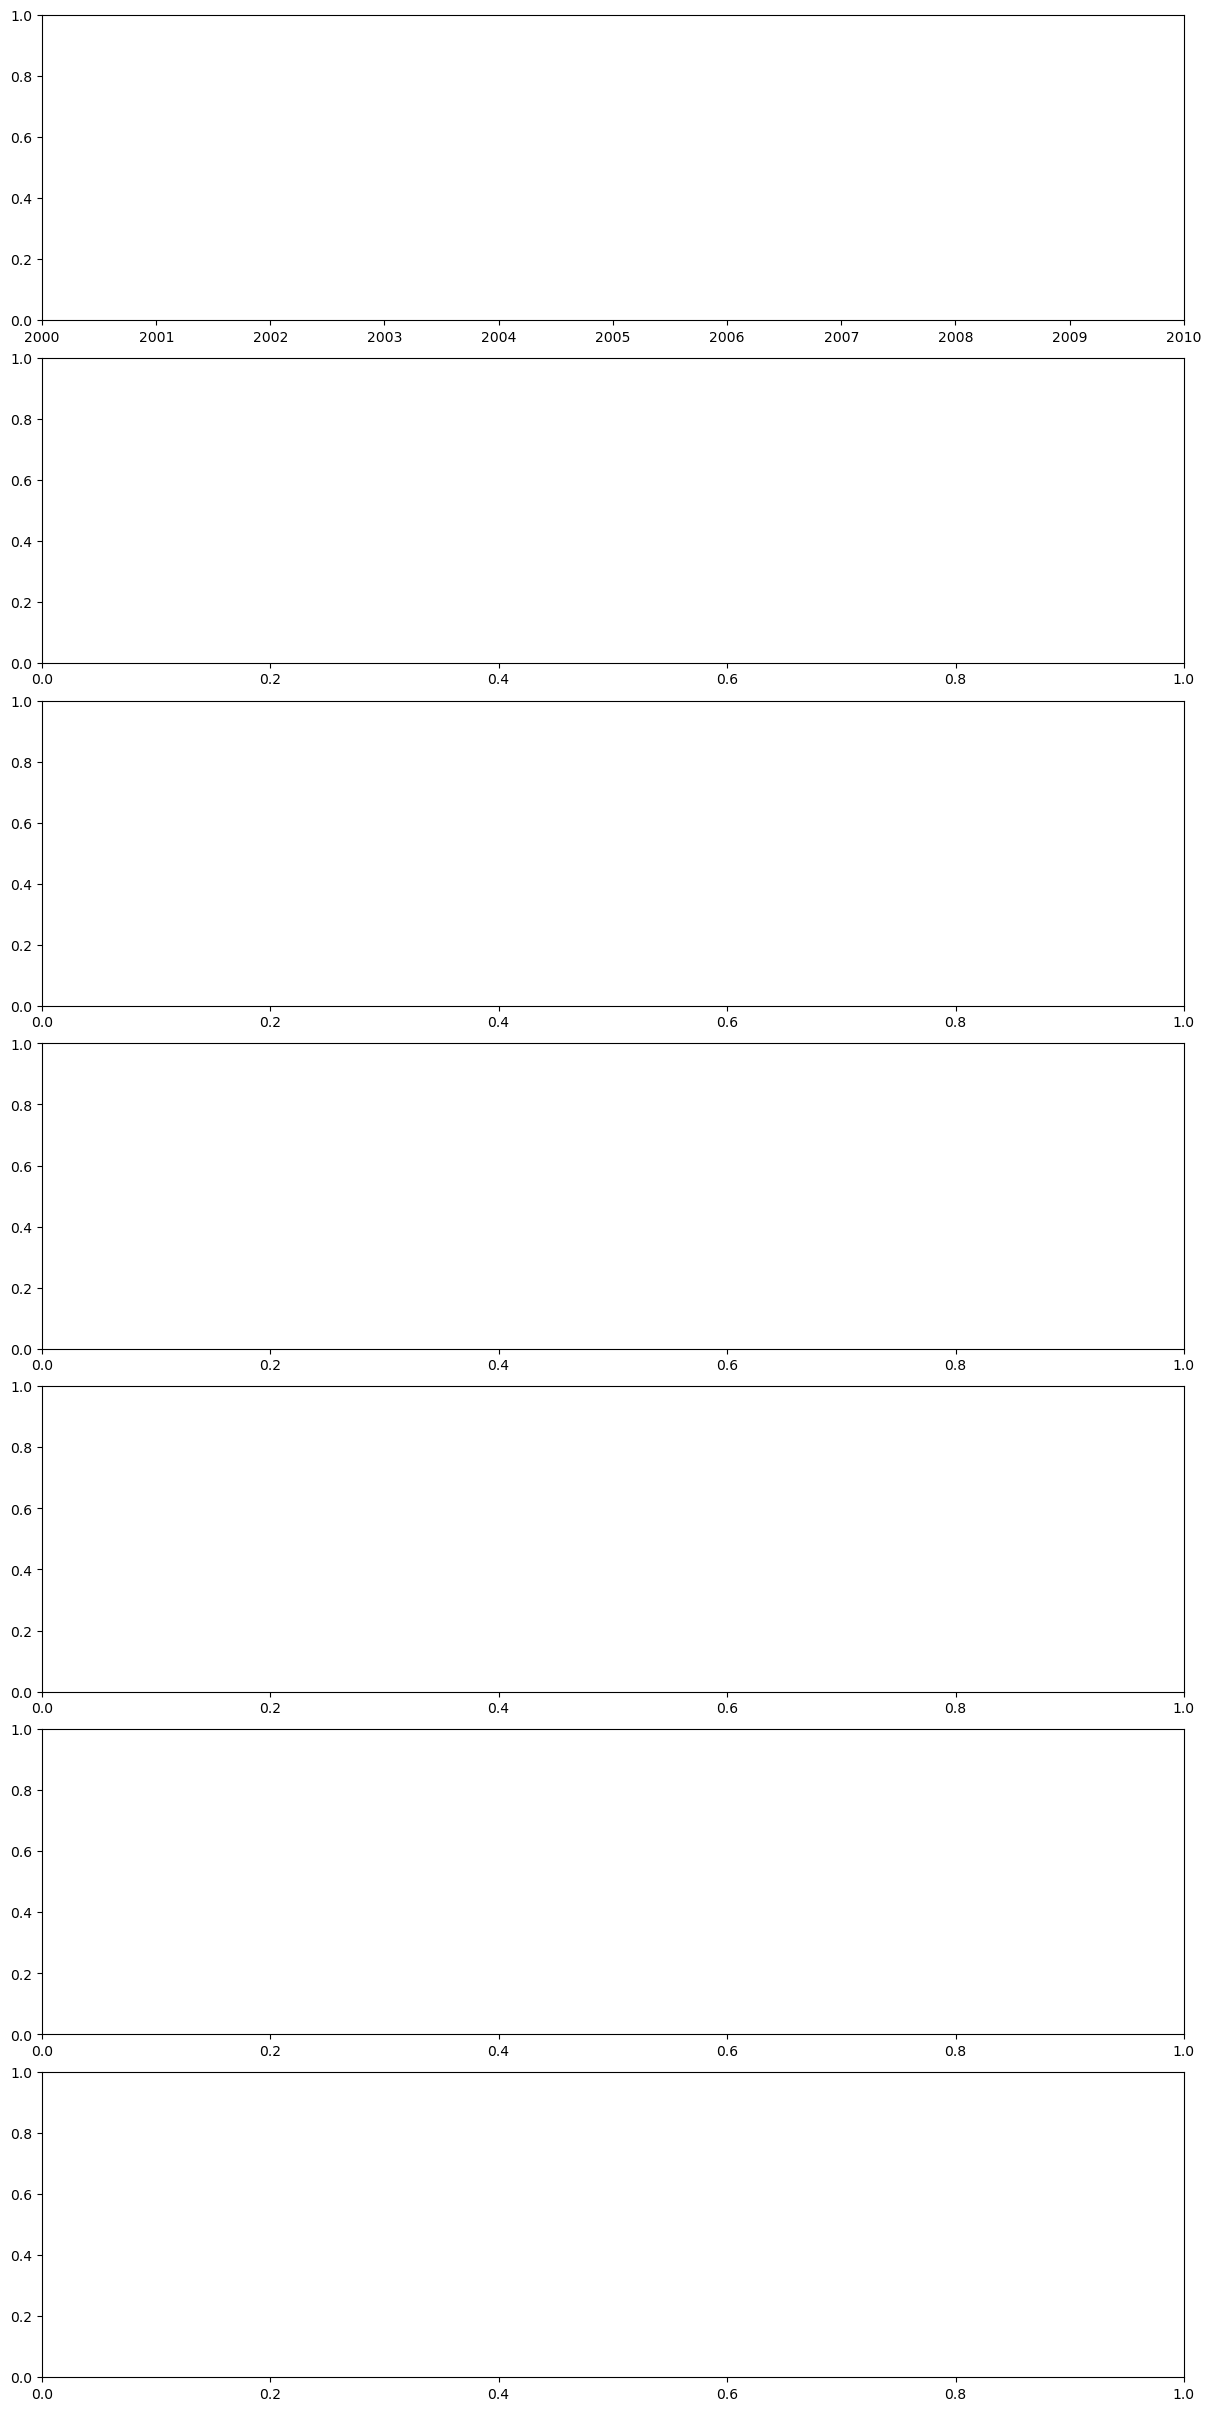

In [51]:
#Perbandingan Data Aktual dan Neuron Output Ke-1 (dari 7 output)


fig, axs = plt.subplots(Y1_Target.shape[1],1,figsize=(12,24),constrained_layout=True)
MAPE_=[]
MSE_ =[]
for i in range(Y1_Target.shape[1]):
    Date_Start= datetime(2020,1,1) + timedelta(days=int(Input_Size/data_normalize.shape[1])+i) 
    X_Plot    = np.arange(Date_Start, Date_Start + timedelta(days=Y1_Target.shape[0]), timedelta(days=1)).astype(datetime)
    axs[i].plot(X_Plot[0],Y1_Target[i],'-o',label='Target')
    axs[i].plot(X_Plot[0],Y1_Test[i],label='Training')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('HS (normalisasi)')
    axs[i].set_xticklabels(X_Plot, rotation=0)
    MAPE_.append(sum(abs((Y1_Target[i]-Y1_Test[i])/Y1_Target[i])*100)/Y1_Target[i].shape[0])
    MSE_.append(sum((Y1_Target[i]-Y1_Test[i])**2)/Y1_Target[i].shape[0])
    axs[i].set_title(r'Hasil Perbandingan Neuron Output Ke-{}, MSE: {:.4f}, MAPE: {:.4f} %'.format(i+1,MSE_[i],MAPE_[i]))



In [ ]:
Date_Start= datetime(2020,1,1) + timedelta(days=int(Input_Size/data_normalize.shape[1])) 
X_Plot    = np.arange(Date_Start, Date_Start + timedelta(days=Y1_Target.shape[0]), timedelta(days=1)).astype(datetime)
pd.DataFrame({'X_Plot':X_Plot,'Target Ke-1':Y1_Target[0]})